# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [63]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [64]:
#column_names = ['store_ID','day_of_week','date','nb_customers_on_day','open','promotion','state_holiday','school_holiday','sales']
#data = pd.read_csv('C:\Users\happy\Documents\ironhack\Week5\day15\prototype\sales.csv', header=None, delimiter=r"\s+", names=column_names)
data = pd.read_csv(r'C:\Users\happy\Documents\ironhack\Week5\day15\prototype\sales.csv')
real_data = pd.read_csv(r'C:\Users\happy\Documents\ironhack\Week5\day15\prototype\REAL_DATA.csv')


In [65]:
data

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...,...,...
640835,359783,409,6,2013-10-26,483,1,0,0,0,4553
640836,152315,97,1,2014-04-14,987,1,1,0,0,12307
640837,117952,987,1,2014-07-07,925,1,0,0,0,6800
640838,435829,1084,4,2014-06-12,725,1,0,0,0,5344


In [66]:
real_data

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0
...,...,...,...,...,...,...,...,...,...
71200,59062,441,7,26/10/2014,0,0,0,0,0
71201,687449,377,7,18/08/2013,0,0,0,0,0
71202,207393,15,3,11/06/2014,648,1,0,0,0
71203,233378,950,2,23/04/2013,626,1,1,0,0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [67]:
#df["date"] = pd.to_numeric(df["date"], errors="coerce")

# Convert the 'date' column to datetime format
#data['date'] = pd.to_datetime(data['date'])

# Convert the datetime to a numerical format (e.g., timestamp) and then to float
#data['date_float'] = data['date'].apply(lambda x: x.timestamp())

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Convert the datetime to a numerical format (Unix timestamp) and store it as a float
data['date'] = data['date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
#data['sales'] = 0
data.rename(columns={"Unnamed: 0": "index"}, inplace=True)
data

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,1.366243e+09,517,1,0,0,0,4422
1,291687,394,6,1.428710e+09,694,1,0,0,0,8297
2,411278,807,4,1.377734e+09,970,1,1,0,0,9729
3,664714,802,2,1.369699e+09,473,1,1,0,0,6513
4,540835,726,4,1.381363e+09,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...,...,...
640835,359783,409,6,1.382746e+09,483,1,0,0,0,4553
640836,152315,97,1,1.397434e+09,987,1,1,0,0,12307
640837,117952,987,1,1.404691e+09,925,1,0,0,0,6800
640838,435829,1084,4,1.402531e+09,725,1,0,0,0,5344


In [68]:
# Convert the 'date' column to datetime format
real_data['date'] = pd.to_datetime(real_data['date'], errors='coerce')

# Convert the datetime to a numerical format (Unix timestamp) and store it as a float
real_data['date'] = real_data['date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
#data['sales'] = 0
real_data

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,1.420243e+09,0,0,0,0,0
1,558468,27,7,NaN,0,0,0,0,0
2,76950,404,3,NaN,657,1,1,0,0
3,77556,683,2,NaN,862,1,0,0,0
4,456344,920,3,NaN,591,1,1,0,0
...,...,...,...,...,...,...,...,...,...
71200,59062,441,7,NaN,0,0,0,0,0
71201,687449,377,7,NaN,0,0,0,0,0
71202,207393,15,3,1.415232e+09,648,1,0,0,0
71203,233378,950,2,NaN,626,1,1,0,0


In [69]:
from sklearn.model_selection import train_test_split

predictor_data = data.drop('sales', axis=1)  # Define predictor_data by dropping the 'sales' column
response_data = data['sales']
X_train, X_test, y_train, y_test = train_test_split(predictor_data, response_data, train_size=0.8, test_size=0.2, random_state=42)

In [70]:
# Ensure all columns in X_train and X_test are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Handle missing values (e.g., fill with 0)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [71]:
from sklearn.linear_model import LinearRegression
data_model = LinearRegression()
data_model.fit(X_train, y_train)
y_train_predict = data_model.predict(X_train)

data_model_test = LinearRegression()
data_model_test.fit(X_test, y_test)
y_test_predict = data_model_test.predict(X_test)




In [72]:
# Convert all columns to numeric, coercing errors to NaN
real_data = real_data.apply(pd.to_numeric, errors="coerce")

# Handle missing values by filling them with 0 (or you can use other strategies like filling with mean)
real_data = real_data.fillna(0)

# Predict sales using the LinearRegression model
real_data["sales"] = data_model.predict(real_data)

# Display the updated real_data DataFrame
real_data

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,272371,415,7,1.420243e+09,0,0,0,0.0,0,12.618296
1,558468,27,7,0.000000e+00,0,0,0,0.0,0,-6829.262044
2,76950,404,3,0.000000e+00,657,1,1,0.0,0,287.994415
3,77556,683,2,0.000000e+00,862,1,0,0.0,0,277.021633
4,456344,920,3,0.000000e+00,591,1,1,0.0,0,-191.004142
...,...,...,...,...,...,...,...,...,...,...
71200,59062,441,7,0.000000e+00,0,0,0,0.0,0,-6884.795597
71201,687449,377,7,0.000000e+00,0,0,0,0.0,0,-6880.923188
71202,207393,15,3,1.415232e+09,648,1,0,0.0,0,5886.113166
71203,233378,950,2,0.000000e+00,626,1,1,0.0,0,75.863042


In [73]:
# Get the coefficients of each feature
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': data_model.coef_
})
coefficients

,Feature,Coefficient
0,index,-0.000009
1,store_ID,-0.144453
2,day_of_week,-56.527694
3,date,0.000005
4,nb_customers_on_day,6.079050
5,open,1674.152998
6,promotion,1273.398357
7,state_holiday,0.000000
8,school_holiday,17.479541


In [74]:
%pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [75]:

import matplotlib.pyplot as plt



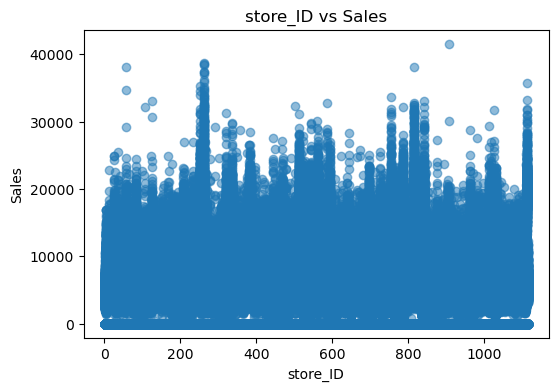

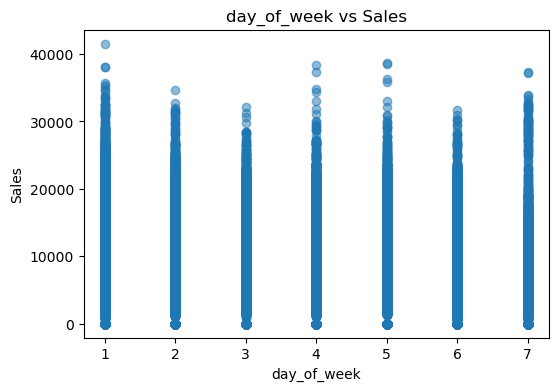

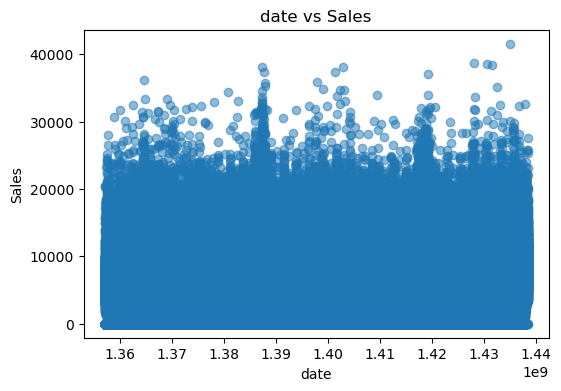

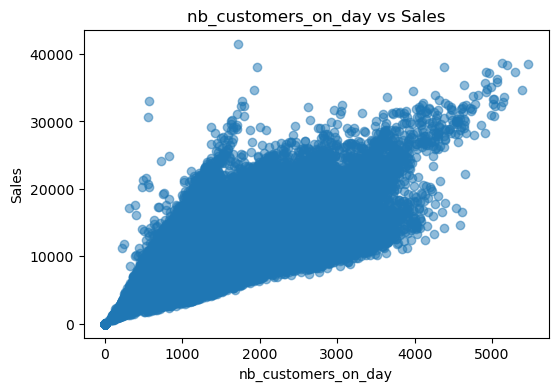

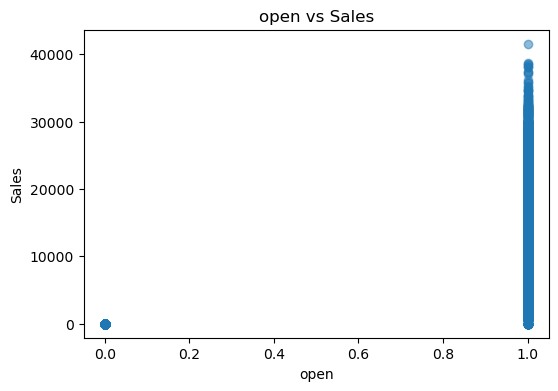

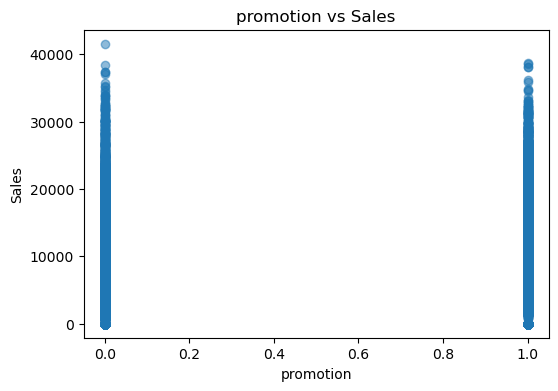

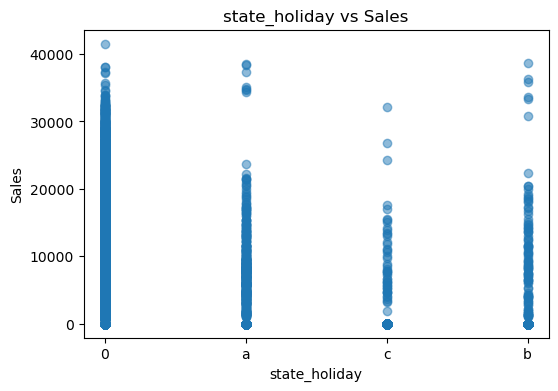

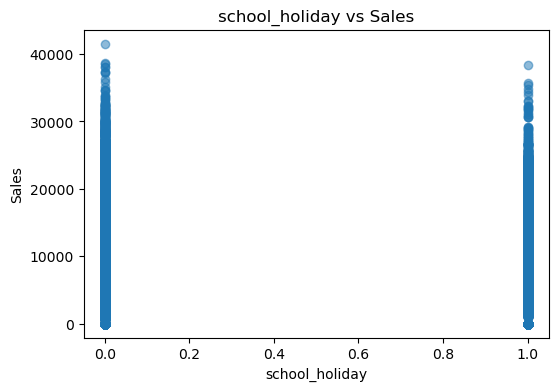

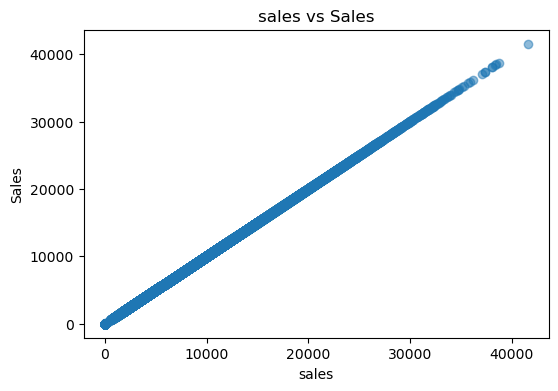

In [76]:


# List of features to plot against 'sales'
features = ['store_ID','day_of_week','date','nb_customers_on_day','open','promotion','state_holiday','school_holiday','sales']  # Replace with your actual feature names

# Create scatter plots for each feature
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(data[feature], data['sales'], alpha=0.5)
    plt.title(f'{feature} vs Sales')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.show()



In [77]:
rsquared_train = data_model.score(X_train, y_train)
print(f"training r squared score is: {rsquared_train}")
rsquared_test = data_model.score(X_test, y_test)
print(f"test r squared score is: {rsquared_test}")
print (X_train)
print(X_test)



training r squared score is: 0.8536711337268224
test r squared score is: 0.8509440883791779
         index  store_ID  day_of_week          date  nb_customers_on_day  \
360184  346971       275            3  1.438128e+09                  680   
162306  351987       729            3  1.401235e+09                 1125   
80802    67795       483            2  1.422922e+09                  936   
607893  510737        11            2  1.438042e+09                  938   
606656  160295       202            4  1.363219e+09                  410   
...        ...       ...          ...           ...                  ...   
110268  362570       388            4  1.388621e+09                 1040   
259178  334768       763            1  1.426464e+09                  714   
365838  395791      1094            4  1.420070e+09                    0   
131932  672969       269            5  1.364515e+09                    0   
121958  684465       141            3  1.423613e+09                  539

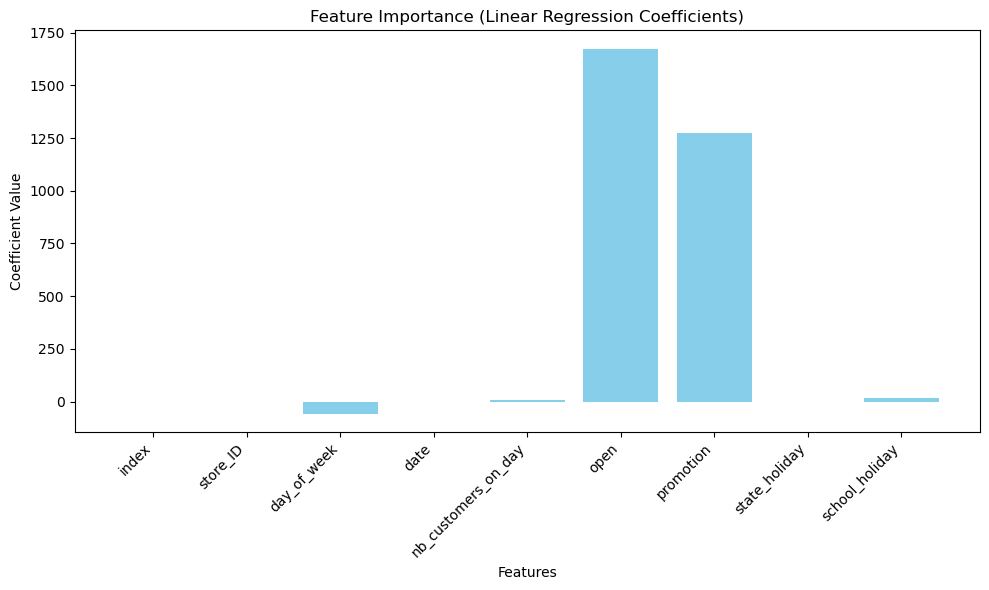

In [78]:
# Plot the coefficients as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.tight_layout()
plt.show()

In [79]:
# features_to_drop = ['store_ID','date','state_holiday']
# # Drop the features from the dataset
# X_train_dropped = X_train.drop(columns=features_to_drop)
# X_test_dropped = X_test.drop(columns=features_to_drop)

# # Train the model with the reduced feature set
# data_model = LinearRegression()
# data_model.fit(X_train_dropped, y_train)

# # Predict using the reduced feature set
# y_train_predict = data_model.predict(X_train_dropped)
# y_test_predict = data_model.predict(X_test_dropped)

# # Get the coefficients of the reduced feature set
# coefficients = pd.DataFrame({
#     'Feature': X_train_dropped.columns,
#     'Coefficient': data_model.coef_
# })
# print(coefficients)
# rsquared_train = data_model.score(X_train_dropped, y_train)
# print(f"training r squared score is: {rsquared_train}")
# rsquared_test = data_model.score(X_test_dropped, y_test)
# print(f"test r squared score is: {rsquared_test}")

In [80]:
# # Drop the first column using drop
# #X_train_dropped2 = X_train.drop(X_train.columns[0], axis=1)
# #X_test_dropped2 = X_test.drop(X_test.columns[0], axis=1)

# #features_to_drop = ['store_ID','day_of_week','date','nb_customers_on_day','open','promotion','state_holiday','school_holiday','sales']
# # if('open' == 0):
# #    features_to_drop2 = ['open','Unnamed: 0','state_holiday','store_ID','date','state_holiday']
# # else:
# features_to_drop2 = ['Unnamed: 0', 'store_ID', 'date', 'state_holiday']  # Drop the features from the dataset
# X_train_dropped2 = X_train.drop(columns=features_to_drop2)
# X_test_dropped2 = X_test.drop(columns=features_to_drop2)

# # Train the model with the reduced feature set
# data_model = LinearRegression()
# data_model.fit(X_train_dropped2, y_train)

# # Predict using the reduced feature set
# y_train_predict = data_model.predict(X_train_dropped2)
# y_test_predict = data_model.predict(X_test_dropped2)

# # Get the coefficients of the reduced feature set
# coefficients = pd.DataFrame({
#     'Feature': X_train_dropped2.columns,
#     'Coefficient': data_model.coef_
# })
# print(coefficients)

# rsquared_train = data_model.score(X_train_dropped2, y_train)
# print(f"training r squared score is: {rsquared_train}")
# rsquared_test = data_model.score(X_test_dropped2, y_test)
# print(f"test r squared score is: {rsquared_test}")
# print (X_train_dropped2)
# print(X_test_dropped2)

In [ ]:
from sklearn.model_selection import train_test_split
predictor_data = data.drop('sales', axis=1)
response_data = data['sales']
X_train, X_test, y_train, y_test = train_test_split(predictor_data, response_data, train_size=0.8, test_size=0.2, random_state=42)

# Ensure all columns in X_train and X_test are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Handle missing values (e.g., fill with 0)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
#rf_model = RandomForestRegressor(n_estimators=10,random_state=42)
rf_model = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest
y_train_rf_predict = rf_model.predict(X_train)
y_test_rf_predict = rf_model.predict(X_test)

# Evaluate Random Forest
rsquared_train_rf = rf_model.score(X_train, y_train)
rsquared_test_rf = rf_model.score(X_test, y_test)
print(f"Random Forest training r squared score: {rsquared_train_rf}")
print(f"Random Forest test r squared score: {rsquared_test_rf}")

# File path for the output
output_file = r'C:\Users\happy\Documents\ironhack\Week5\day15\prototype\g3.txt'

# Open the file in write mode and save the output
with open(output_file, 'w') as file:
    file.write(f"Random Forest training r squared score: {rsquared_train_rf}\n")
    #file.write(f"Random Forest test r squared score: {rsquared_test_rf}\n")

Random Forest training r squared score: 0.8621597390867237
Random Forest test r squared score: 0.8597576635736747


In [88]:
real_data

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,272371,415,7,1.420243e+09,0,0,0,0.0,0,12.618296
1,558468,27,7,0.000000e+00,0,0,0,0.0,0,-6829.262044
2,76950,404,3,0.000000e+00,657,1,1,0.0,0,287.994415
3,77556,683,2,0.000000e+00,862,1,0,0.0,0,277.021633
4,456344,920,3,0.000000e+00,591,1,1,0.0,0,-191.004142
...,...,...,...,...,...,...,...,...,...,...
71200,59062,441,7,0.000000e+00,0,0,0,0.0,0,-6884.795597
71201,687449,377,7,0.000000e+00,0,0,0,0.0,0,-6880.923188
71202,207393,15,3,1.415232e+09,648,1,0,0.0,0,5886.113166
71203,233378,950,2,0.000000e+00,626,1,1,0.0,0,75.863042


In [86]:
# Convert all columns to numeric, coercing errors to NaN
real_data = real_data.apply(pd.to_numeric, errors="coerce")

# Handle missing values by filling them with 0 (or you can use other strategies like filling with mean)
real_data = real_data.fillna(0)

# Drop the 'sales' column as it was not part of the training data
real_data_rf = real_data.drop(columns=['sales'])

# Predict sales using the RandomForestRegressor model
real_data_rf["sales"] = rf_model.predict(real_data_rf)

# Save the updated DataFrame back to the CSV file (optional)
real_data.to_csv(r'C:\Users\happy\Documents\ironhack\Week5\day15\prototype\g3.csv', index=False)

# Display the updated real_data DataFrame
real_data_rf

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,272371,415,7,1.420243e+09,0,0,0,0.0,0,0.000264
1,558468,27,7,0.000000e+00,0,0,0,0.0,0,0.000264
2,76950,404,3,0.000000e+00,657,1,1,0.0,0,6594.154749
3,77556,683,2,0.000000e+00,862,1,0,0.0,0,7333.353675
4,456344,920,3,0.000000e+00,591,1,1,0.0,0,6594.154749
...,...,...,...,...,...,...,...,...,...,...
71200,59062,441,7,0.000000e+00,0,0,0,0.0,0,0.000264
71201,687449,377,7,0.000000e+00,0,0,0,0.0,0,0.000264
71202,207393,15,3,1.415232e+09,648,1,0,0.0,0,5533.231698
71203,233378,950,2,0.000000e+00,626,1,1,0.0,0,6594.154749
